Hello world example for the Draculab paper

/home/z/projects/draculab


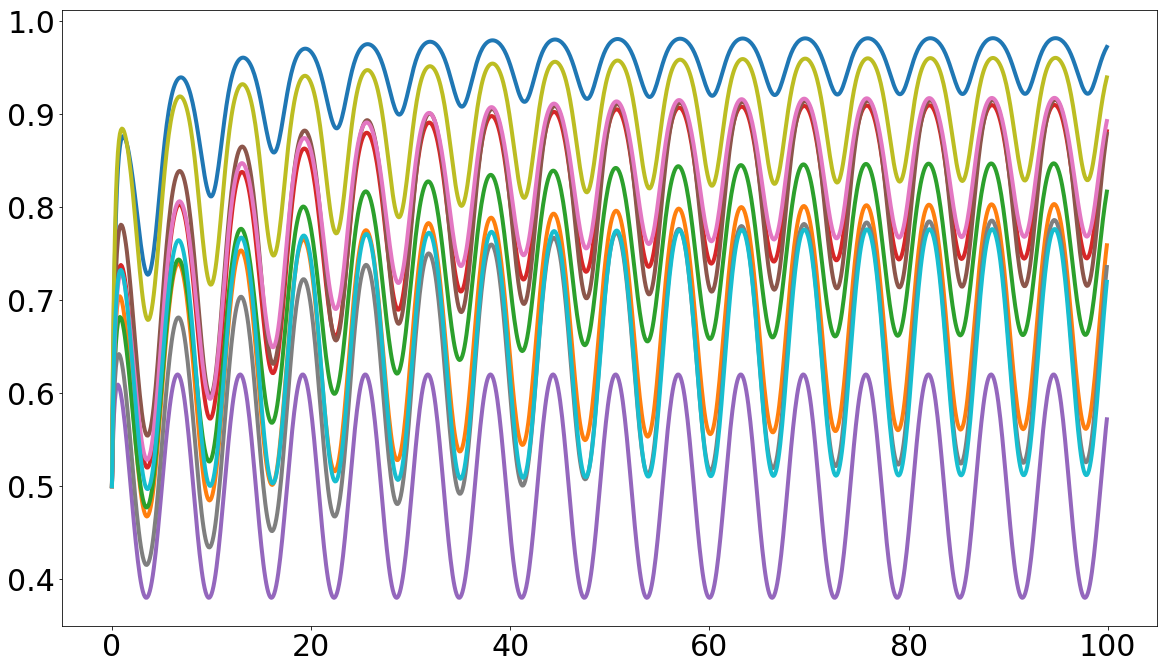

In [1]:
%cd ..
from draculab import *
import numpy as np
import matplotlib.pyplot as plt

# create a network object
net_params = {'min_delay': 0.1,     # minimum connection delay
              'min_buff_size': 10 } # minimum buffer size
net = network(net_params) # creates the network

# create units in the network
sig_params = {'type': unit_types.sigmoidal, # unit model
               'init_val': 0.5,  # initial value for all sigmoidal units
               'slope': 1,       # slope of the sigmoidal function
               'thresh': 0.,     # threshold of the sigmoidal function
               'tau': 0.2,       # time constant of the sigmoidal unit
               'tau_fast': 0.1 } # time constant of the 'fast' low-pass filter
             
inp_params = {'type': unit_types.source, # source units provide inputs
              'init_val': 1.,
              'function': lambda t: np.cos(t) } # a cosine function
sig_units = net.create(10, sig_params) # create 10 sigmoidal units
inp_unit = net.create(1, inp_params)  # create 1 input unit

# create connections between the sigmoidal units
conn_spec = {'rule': 'fixed_outdegree', # rule to create connections
             'outdegree': 2,    # each unit sends 2 projections randomly
             'delay': 0.2 }      # all connections have a delay of .2 time units
syn_spec = {'type': synapse_types.oja, # synapses use the Oja learning rule
            'init_w': {'distribution': 'uniform', 'low': 0.1, 'high': 1.},
            'lrate': 0.1 }  # learning rate for the Oja rule
net.connect(sig_units, sig_units, conn_spec, syn_spec) # create the connections

# connect the input to the sigmoidal units
conn_spec_2 = {'rule': 'all_to_all', # rule to create connections
             'delay': 0.1 } # all connections have a delay of .1 time units
syn_spec_2 = {'type': synapse_types.static, # synapses don't change
            'init_w': 0.5 } # all synapses have this initial weight
net.connect(inp_unit, sig_units, conn_spec_2, syn_spec_2) # create the connections

# run the simulation for 10 time units
sim_data = net.run(100.)

# visualize using standard Matplotlib tools
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_axes([0.05, 0.05, .95, .95])
ax1.tick_params(labelsize=30)
sig_activs = np.array(sim_data[1])[sig_units] 
ax1.plot(sim_data[0], sig_activs.transpose(), linewidth=4)
plt.show()